In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch



In [2]:
num_samples = 100
np.random.seed(42)

# Generate data with large feature scale
x = np.random.uniform(0, 1000, num_samples)
f_x = 3 * x + 2
eps = np.random.randn(num_samples)
y = f_x + eps

In [3]:
x = torch.tensor(x, dtype=torch.float32).view(-1,1)
y = torch.tensor(y, dtype=torch.float32).view(-1,1)

In [4]:
#here we added the intercept/bias term and represented the x in a matrix form shape (100,2)
# made the labels y as a matrix of shape (100,1)

X = torch.cat([torch.ones(num_samples,1), x], dim=1)
y = y.reshape(-1,1)

In [5]:
# we computed least squares solution matrix form θ* = (X^T X)^(-1) X^T y
theta_ls = torch.linalg.lstsq(X, y).solution
print(theta_ls)


tensor([[2.2151],
        [2.9995]])


In [6]:
# we initialized gradient descent parameters
theta = torch.zeros((2,1), requires_grad=True)
alpha = 1e-7 # we kept it very small as there was no feature scaling
epsilon = 0.001
max_iters = 100000
mse_history = []

In [20]:
# now we iterated for the gradient descent, keeping the max_iterations as 100000
for it in range(max_iters):
    y_pred = X @ theta
    mse = torch.mean((y - y_pred)**2)
    mse_history.append(mse.item())
    print(mse.item())
    mse.backward()  # compute gradient
    
    with torch.no_grad():
        theta -= alpha * theta.grad
        theta_diff = torch.norm(theta - theta_ls)
        theta.grad.zero_()  # reset gradients
    
    if theta_diff < epsilon:
        print(f"Converged in {it+1} iterations")
        break
else:
    print("Did not converge within max_iters")

2.1778321266174316
2.1778316497802734
2.1778316497802734
2.1778316497802734
2.1778316497802734
2.1778316497802734
2.1778316497802734
2.1778316497802734
2.1778316497802734
2.1778314113616943
2.1778314113616943
2.1778314113616943
2.1778314113616943
2.1778314113616943
2.1778314113616943
2.1778314113616943
2.1778314113616943
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830696105957
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.177830457687378
2.1778197288513184
2.1778197288513184
2.1778197288513184
2.1778197288513184
2.1778197288513184
2.1778197288513184
2.1778197288513184
2.17

In [52]:
print("theta found by gradient descent:", theta.ravel())
print("theta* (analytical solution):", theta_ls.ravel())
print(mse)
print(f"min MSE Loss in Gradient Descent without Feature Scaling: {min(mse_history)}")
print(f"max MSE Loss in Gradient Descent without Feature Scaling: {max(mse_history)}")

theta found by gradient descent: tensor([0.0295, 3.0029], grad_fn=<ViewBackward0>)
theta* (analytical solution): tensor([2.2151, 2.9995])
tensor(2.1623, grad_fn=<MeanBackward0>)
min MSE Loss in Gradient Descent without Feature Scaling: 2.162327527999878
max MSE Loss in Gradient Descent without Feature Scaling: 2783566.0


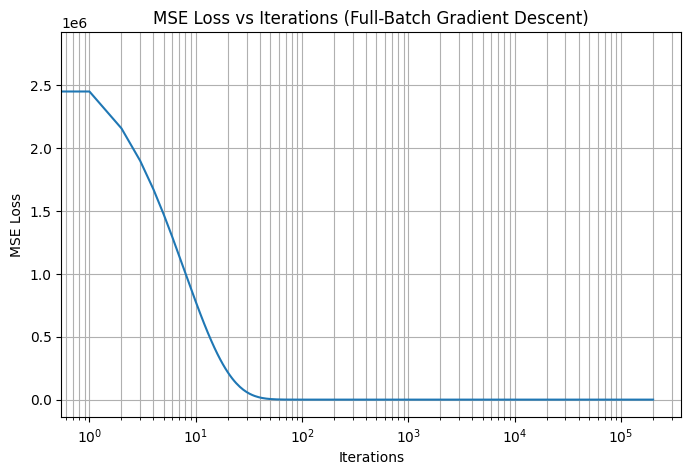

In [53]:
plt.figure(figsize=(8,5))
plt.plot(mse_history)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.xscale("log")

plt.title("MSE Loss vs Iterations (Full-Batch Gradient Descent)")
plt.grid(True, which = "both")
plt.show()

C:\Users\krish.HP.000\AppData\Local\Temp\ipykernel_5752\397793504.py:6: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(min(mse_history[-10:]),max(mse_history[-10:]))


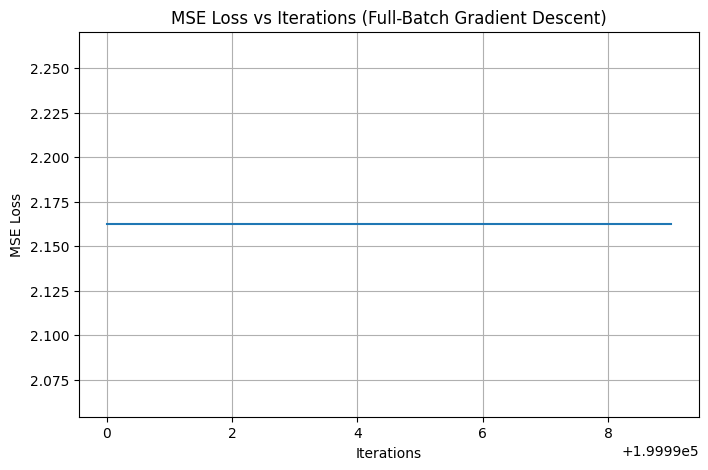

In [54]:
plt.figure(figsize=(8,5))
iterations = list(range(len(mse_history)-10, len(mse_history)))
plt.plot(iterations, mse_history[-10:])
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.ylim(min(mse_history[-10:]),max(mse_history[-10:]))

plt.title("MSE Loss vs Iterations (Full-Batch Gradient Descent)")
plt.grid(True, which = "both")
plt.show()

# Full-Batch Descent With Feature Scaling

In [61]:
# we did a z-score normalization
mu_x = x.mean()
sigma_x = x.std()
x_scaled = (x - mu_x) / sigma_x

print(f"mean x: {mu_x}")
print(f"variance x: {sigma_x}")
print(f"scaled x: \n {x_scaled}")
x_scaled.shape

mean x: 470.1807861328125
variance x: 297.4894104003906
scaled x: 
 tensor([[-0.3215],
        [ 1.6153],
        [ 0.8801],
        [ 0.4319],
        [-1.0560],
        [-1.0561],
        [-1.3852],
        [ 1.3311],
        [ 0.4401],
        [ 0.7997],
        [-1.5113],
        [ 1.6798],
        [ 1.2177],
        [-0.8667],
        [-0.9693],
        [-0.9640],
        [-0.5578],
        [ 0.1835],
        [-0.1285],
        [-0.6015],
        [ 0.4762],
        [-1.1116],
        [-0.5985],
        [-0.3490],
        [-0.0474],
        [ 1.0588],
        [-0.9093],
        [ 0.1481],
        [ 0.4109],
        [-1.4244],
        [ 0.4617],
        [-1.0073],
        [-1.3618],
        [ 1.6091],
        [ 1.6654],
        [ 1.1369],
        [-0.5565],
        [-1.2522],
        [ 0.7195],
        [-0.1009],
        [-1.1703],
        [ 0.0840],
        [-1.4649],
        [ 1.4762],
        [-0.7106],
        [ 0.6465],
        [-0.5327],
        [ 0.1677],
        [ 0.2573],
 

torch.Size([100, 1])

In [62]:
# now we make the X_scaled matrix by putting a column of 1 for N rows for the bias term
X_scaled = torch.cat([torch.ones(num_samples,1), x_scaled], dim=1)  # shape (100,2)
y = y.reshape(-1,1)
X_scaled.shape

torch.Size([100, 2])

In [63]:
# the theta star was calculated using the least square method using the X_scaled 
theta_ls_scaled = torch.linalg.lstsq(X_scaled, y).solution
print(theta_ls_scaled)


tensor([[1412.5415],
        [ 892.3315]])


In [73]:
# now we again did gradient descent using the scaled version of X.
theta = torch.zeros((2,1), dtype=torch.float32, requires_grad=True)
alpha = 0.05  # now we can use a larger learning rate as the features are scaled
epsilon = 0.001
max_iters = 100000
mse_history_scaled = []

In [74]:
for it in range(max_iters):
    y_pred = X_scaled @ theta
    mse = torch.mean((y - y_pred)**2)
    mse_history_scaled.append(mse.item())
    
    mse.backward()  # compute gradient
    
    with torch.no_grad():
        theta -= alpha * theta.grad
        theta_diff = torch.norm(theta - theta_ls_scaled)
        theta.grad.zero_()
    
    if theta_diff < epsilon:
        print(f"Converged in {it+1} iterations")
    
        break
else:
    print("Did not converge within max_iters")

Converged in 139 iterations


In [75]:
print("theta found by gradient descent - with feature scaling:", theta.ravel())
print("theta* (analytical solution) - with feature scaling:", theta_ls_scaled.ravel())


theta found by gradient descent - with feature scaling: tensor([1412.5408,  892.3310], grad_fn=<ViewBackward0>)
theta* (analytical solution) - with feature scaling: tensor([1412.5415,  892.3315])


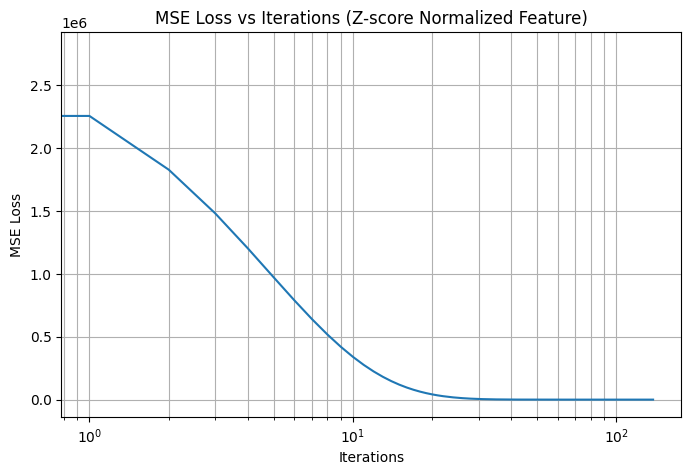

In [76]:
# we plotted the mse loss versus iterations of gradient descent using feature scaling(z-score)
plt.figure(figsize=(8,5))
plt.plot(mse_history_scaled)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.xscale("log")
plt.title("MSE Loss vs Iterations (Z-score Normalized Feature)")
plt.grid(True, which="both")
plt.show()

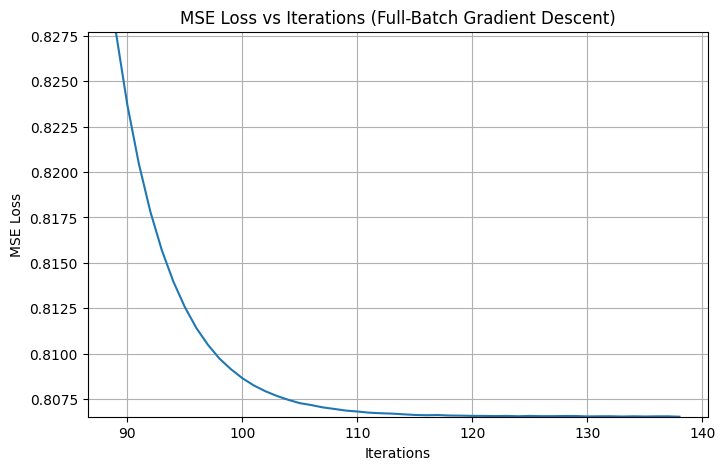

In [78]:
plt.figure(figsize=(8,5))
iterations = list(range(len(mse_history_scaled)-50, len(mse_history_scaled)))
plt.plot(iterations, mse_history_scaled[-50:])
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.ylim(min(mse_history_scaled[-50:]),max(mse_history_scaled[-50:]))

plt.title("MSE Loss vs Iterations (Full-Batch Gradient Descent)")
plt.grid(True, which = "both")
plt.show()